In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

## Firstly using logistic regression for comparation ##

In [2]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:,:-1]
    Y = data[:,-1]
    
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
#     Z = np.zeros((N,4))
#     Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
#     X2[:,-4:] = Z
    
#     assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

0 0.393830700203 0.393830700203
1000 0.0850885133312 0.0850885133312
2000 0.0816737781999 0.0816737781999
3000 0.0804248884346 0.0804248884346
4000 0.0798021789805 0.0798021789805
5000 0.0794416680228 0.0794416680228
6000 0.0792131754417 0.0792131754417
7000 0.0790592091706 0.0790592091706
8000 0.0789507532586 0.0789507532586
9000 0.0788717303165 0.0788717303165
Final train classification_rate: 0.9175
Final train classification_rate: 0.9175


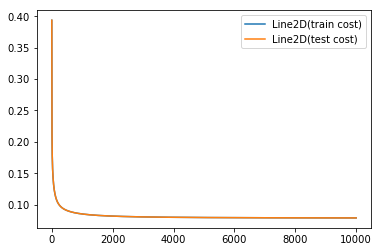

In [3]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[:-100]
Ytest = Y[:-100]
Ytest_ind = y2indicator(Ytest, K)

W = np.random.randn(D, K)
b = np.zeros(K)

def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final train classification_rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

## Now using Neural Network ##

0 0.554580337174 0.554580337174
1000 0.042572951893 0.042572951893
2000 0.0352224100372 0.0352224100372
3000 0.0290293408642 0.0290293408642
4000 0.0249670053149 0.0249670053149
5000 0.0231236874893 0.0231236874893
6000 0.0217285675945 0.0217285675945
7000 0.0205908595085 0.0205908595085
8000 0.0196942606843 0.0196942606843
9000 0.0189424405053 0.0189424405053
Final train classification_rate: 0.9775
Final train classification_rate: 0.9775


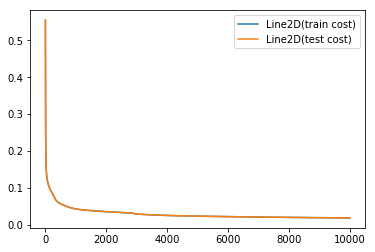

In [4]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)

M = 5
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[:-100]
Ytest = Y[:-100]
Ytest_ind = y2indicator(Ytest, K)

#random initializing weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum()
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final train classification_rate:", classification_rate(Ytest, predict(pYtest)))
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

Neural network reached a bigger accuracy rate